In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Load the pretrained ResNet50 model
model = ResNet50(weights="imagenet")

In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [4]:
from PIL import Image


# Prediction Function
def predict_image(model, image_path):
    """
    Predicts the class of the given image using the ResNet50 model.

    Args:
        model: Pre-trained ResNet50 model.
        image_path: Path to the image file.

    Returns:
        Top predictions as a list of (class, description, score).
    """
    # Load the image with the required target size for ResNet50
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Add a batch dimension (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image for ResNet50
    img_array = preprocess_input(img_array)

    # Predict the image class
    predictions = model.predict(img_array)

    # Decode the predictions into readable labels
    decoded_predictions = decode_predictions(predictions, top=5)  # Top 5 predictions
    return decoded_predictions[0]



1/1 [==============================] - 1s 1s/step
rapeseed: 0.8848
zebra: 0.1137
worm_fence: 0.0002
park_bench: 0.0001
Appenzeller: 0.0001


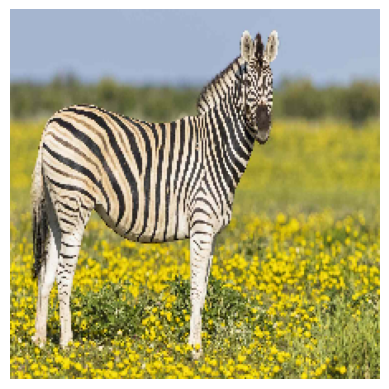

In [5]:
# Example usage


image_path = "./image.png"  # Replace with the actual path to your image
predictions = predict_image(model, image_path)

# Display the predictions
for class_name, description, score in predictions:
    print(f"{description}: {score:.4f}")

# Display the image
plt.imshow(load_img(image_path, target_size=(224, 224)))
plt.axis("off")
plt.show()
